# Tutorial 1 - van Baar, Chang, & Sanfey 2019

## 1.4 Model the Data Generation Process

First, let's define the functions

In [51]:
import numpy as np
import pandas as pd

def payout_maximization(investment, multiplier, returned):
    return ((investment * multiplier) - returned) / (investment * multiplier)

def inequity(investment, multiplier, returned, endowment):
    return(((((investment * multiplier) - returned)/((investment * multiplier) + (endowment - investment))) - 0.5)**2)

def guilt(investment, believed_multiplier, returned, multiplier):
    return ((((investment * believed_multiplier * 0.5) - returned)/(investment * believed_multiplier))**2)

Now let's check and see if they do what we want. Let's see the differences between each of these three norms when an investor invests all of their money in each condition:

In [52]:
choices = np.arange(0, 10 * 2 + 1)  
example2 = pd.DataFrame({'Returned': np.tile(choices, 3)})

example2['y'] = np.concatenate([
    payout_maximization(investment=10, multiplier=2, returned=choices),
    inequity(investment=10, multiplier=2, returned=choices, endowment=10),
    guilt(investment=10, believed_multiplier=4, multiplier=2, returned=choices)
])

example2['group'] = np.repeat(['Greed', 'Inequity', 'Guilt'], len(choices))

choices = np.arange(0, 10 * 4 + 1)  
example4 = pd.DataFrame({'Returned': np.tile(choices, 3)})

example4['y'] = np.concatenate([
    payout_maximization(investment=10, multiplier=4, returned=choices),
    inequity(investment=10, multiplier=4, returned=choices, endowment=10),
    guilt(investment=10, believed_multiplier=4, multiplier=4, returned=choices)
])

example4['group'] = np.repeat(['Greed', 'Inequity', 'Guilt'], len(choices))

choices = np.arange(0, 10 * 6 + 1)  
example6 = pd.DataFrame({'Returned': np.tile(choices, 3)})

example6['y'] = np.concatenate([
    payout_maximization(investment=10, multiplier=6, returned=choices),
    inequity(investment=10, multiplier=6, returned=choices, endowment=10),
    guilt(investment=10, believed_multiplier=4, multiplier=6, returned=choices)
])

example6['group'] = np.repeat(['Greed', 'Inequity', 'Guilt'], len(choices))

Now we can view the outputs of this example to make sure they look correct: starting with multiplier of 2

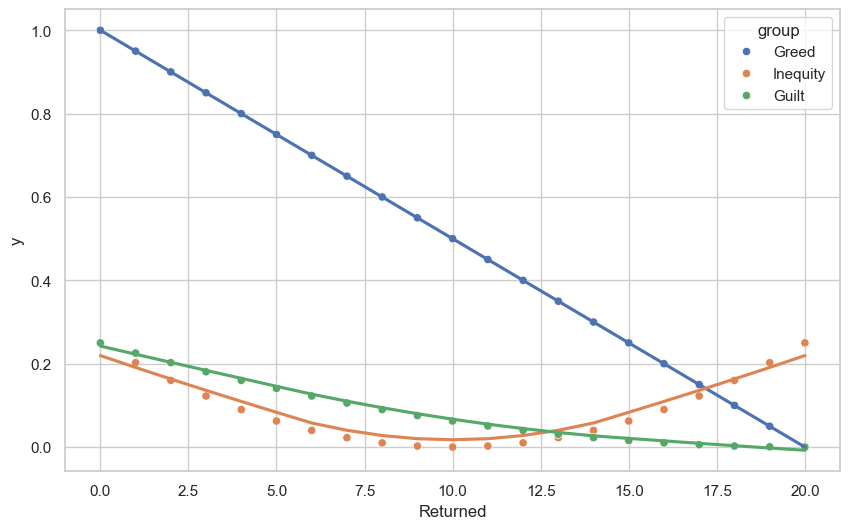

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=example2, x='Returned', y='y', hue='group', palette='deep')

for group in example2['group'].unique():
    sns.regplot(data=example2[example2['group'] == group], 
                x='Returned', y='y', 
                scatter=False, 
                label=f'{group} Trend', 
                lowess=True)

plt.show()

And for a multiplier of 4:

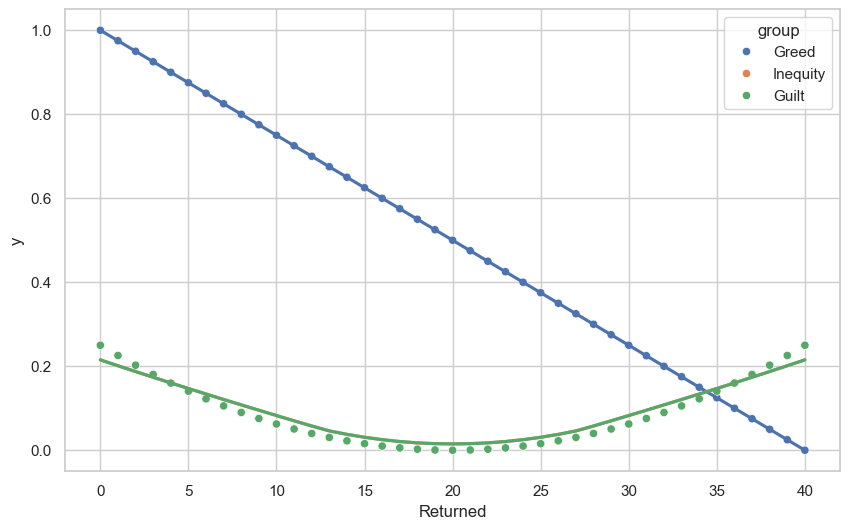

In [54]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=example4, x='Returned', y='y', hue='group', palette='deep')

for group in example4['group'].unique():
    sns.regplot(data=example4[example4['group'] == group], 
                x='Returned', y='y', 
                scatter=False, 
                label=f'{group} Trend', 
                lowess=True)

plt.show()

And finally for 6:

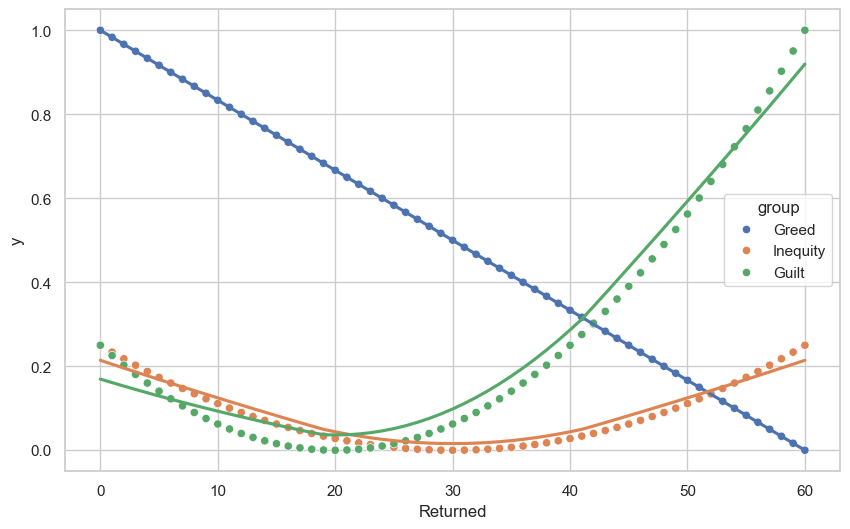

In [55]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=example6, x='Returned', y='y', hue='group', palette='deep')

for group in example6['group'].unique():
    sns.regplot(data=example6[example6['group'] == group], 
                x='Returned', y='y', 
                scatter=False, 
                label=f'{group} Trend', 
                lowess=True)

plt.show()

These functions seem to align with our intuitions, so we can proceed. Something to note here is that there seems to be guilt for the 6 multiplier condition above the investor's expected return of 20: if investor gets more than they expect, the trustee feels guilty. This doesn't exactly make sense but it's an edge case since people rarely give more than half of what they are expected to give back. It also helps because it aids the model in making specific predictions. Something to keep track of though.

## 1.5 Simulating Data

Now let's preallocate and define functions, triallist, and parameters

In [56]:
trialList = pd.DataFrame({
    'Investment': np.tile(np.arange(1, 11), 6),
    'Multiplier':  np.repeat([2, 4, 6], repeats=20),
    'Believed_Multiplier':  np.repeat(4, 60),
    'Endowment':  np.repeat(10, 60)
})

trialList

,Investment,Multiplier,Believed_Multiplier,Endowment
0,1,2,4,10
1,2,2,4,10
2,3,2,4,10
3,4,2,4,10
4,5,2,4,10
5,6,2,4,10
6,7,2,4,10
7,8,2,4,10
8,9,2,4,10
9,10,2,4,10


In [57]:
def utility(theta, phi, guilt, inequity, payout):
    return(theta*payout - (1-theta)*min((guilt + phi, inequity - phi)))


freeParameters = pd.DataFrame({
    'theta': np.repeat(np.arange(0, 0.505, 0.005), repeats=101),
    'phi': np.tile(np.arange(-0.1, 0.102, 0.002), 101)
})

predictions = pd.DataFrame(np.zeros((len(freeParameters), len(trialList))))

Now that all of that's done, let's generate predictions

In [58]:
import random
non_specific = np.zeros(len(freeParameters))

for i in range(len(freeParameters)):
    [Theta, Phi] = freeParameters.iloc[i]

    for k in range(len(trialList)):
        [I, M, B, E] = trialList.iloc[k]
        Choices = list(range(0, I * M + 1, 1))

        Utility = [0] * len(Choices)
        for n in range(len(Choices)):
            Utility[n] = utility(theta=Theta,
                                phi=Phi,
                                guilt=guilt(I, B, Choices[n], M),
                                inequity=inequity(I, M, Choices[n], E),
                                payout=payout_maximization(I, M, Choices[n]))
        
        correct_choice = []
        for n in range(len(Choices)): 
            if Utility[n] == max(Utility):
                correct_choice.append(n)
        if len(correct_choice) > 1:
            non_specific[i] += 1
        predictions.iloc[i, k] = Choices[correct_choice[0]]

## 1.6 Compare Recovered Parameters

Let's write the objective function

In [67]:
from scipy.stats import norm

def obj_function(params, decisions, method="OLS"):
    [Theta, Phi] = params
    
    predicted_utility = np.zeros(len(trialList))
    observed_utility = np.zeros(len(trialList))

    for k in range(len(trialList)):
        [I, M, B, E] = trialList.iloc[k]
        R = int(decisions[k])
        Choices = np.arange(0, I * M + 1, 1)
        
        Utility = np.zeros(len(Choices))
        for n in range(len(Choices)):
            Utility[n] = utility(Theta, Phi, 
                                 guilt(I, B, Choices[n], M), 
                                 inequity(I, M, Choices[n], E), 
                                 payout_maximization(I, M, Choices[n]))
        
        predicted_utility[k] = np.max(Utility)
        Choices = Choices.tolist()
        try:
            Choice = Choices.index(R)
        except ValueError:
            closest_index = (np.abs(np.array(Choices) - R)).argmin()
            if len(closest_index) > 1:
                Choice = Choice[0]
            else:
                Choice = Choices[closest_index]
        observed_utility[k] = Utility[Choice]

    if method == "OLS":
        return np.sum((predicted_utility - observed_utility)**2)
    elif method == "MLE":
        sd = np.std(observed_utility - predicted_utility)
        return -1 * np.sum(norm.logpdf(observed_utility, loc=predicted_utility, scale=sd))

Now we can set up the optimizer

In [68]:
from scipy.optimize import minimize

initial_params = [0, 0]
lower_bounds = [0, -0.1]
upper_bounds = [0.5, 0.1]

theta_recovered = np.zeros(11**2)
phi_recovered = np.zeros(11**2)
theta_true = np.repeat(np.arange(0, 0.55, 0.05), 11)  
phi_true = np.tile(np.arange(-0.1, 0.12, 0.02), 11)

And now we can recover the free parameters

In [69]:
for i in range(len(theta_true)):
    this_idx = np.where((round(theta_true[i]*20) == np.round(freeParameters['theta'] * 20)) & 
                        (round(phi_true[i]*50) == np.round(freeParameters['phi'] * 50)))[0][0]
    decisions = predictions.iloc[this_idx, :]
    result = minimize(obj_function, x0=initial_params, args=(decisions,), bounds=list(zip(lower_bounds, upper_bounds)), tol=1e-08, method="L-BFGS-B") 

    theta_recovered[i] = result.x[0] 
    phi_recovered[i] = result.x[1]

So we can now assess the reliability of our parameter recovery process

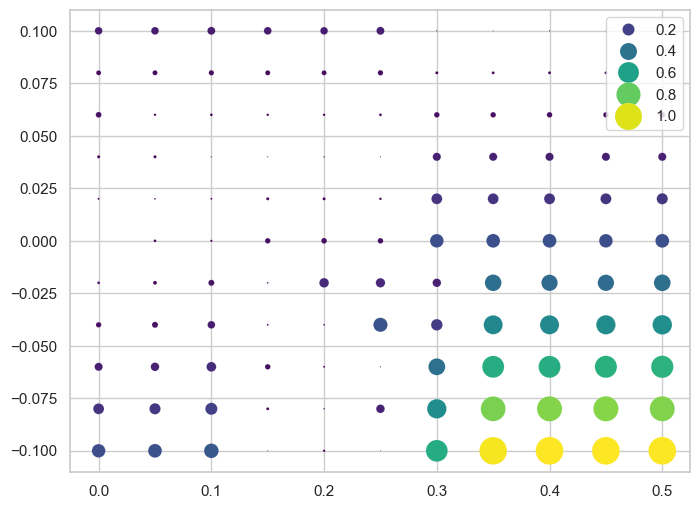

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

distance = (2 * (theta_recovered - theta_true))**2 + (5 * (phi_recovered - phi_true))**2

plt.figure(figsize=(8, 6))
sns.scatterplot(x=theta_true, y=phi_true, hue=distance, size=distance, sizes=(0, 400), palette="viridis")
plt.show()

Yeah, so there seems to be substantial underprediction of phi at values of theta greater than 0.3. There may be some inaccuracies in the parameter recovery process, but let's see what happens if we account for the dependency between our free parameters that.

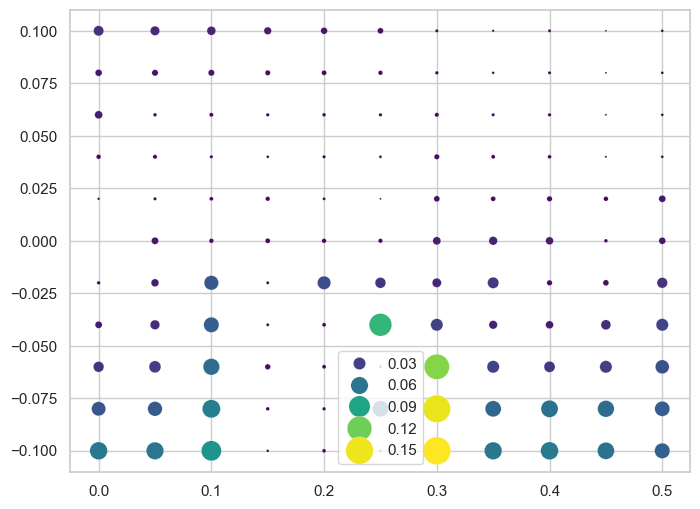

In [71]:
distance_new = (2*(theta_recovered - theta_true))**2 + (10*(0.5-theta_true)*(phi_recovered - phi_true))**2

plt.figure(figsize=(8, 6))
sns.scatterplot(x=theta_true, y=phi_true, hue=distance_new, size=distance_new, sizes=(0, 400), palette="viridis")
plt.show()

Much, much better. We can very reliably recover our free parameters.

## 1.7 A Priori Clustering

In the original paper, the authors report primarily on fMRI data which used a certain trial set and allowed participants to return between 0 and the amount they received after the investment was multiplied in increments of 10% or more. Let's read in that trial set and generate predictions for it given that information.

In [72]:
trialListFMRI = pd.read_csv("C:/Users/DELL/Downloads/tutorial1_Data/allDataLong.csv", sep=',')
trialListFMRI = trialListFMRI[trialListFMRI['Subject'] == 122]
trialListFMRI = trialListFMRI[trialListFMRI['Investment'] != 0]
predictionsFMRI = pd.DataFrame(np.zeros((len(freeParameters), len(trialListFMRI))))
for i in range(len(freeParameters)):
    [Theta, Phi] = freeParameters.iloc[i]

    for k in range(len(trialListFMRI)):
        [E, I, M, B] = trialListFMRI.iloc[k]
        I = int(I)
        M = int(M)
        E = 10
        B = 4
        if I * M < 10:
            Choices = list(range(0, I * M + 1, 1))
        else: 
            Choices = list(range(0, I * M + 1, round((I * M)/10)))
            
        Utility = [0] * len(Choices)
        for n in range(len(Choices)):
            Utility[n] = utility(theta=Theta,
                                phi=Phi,
                                guilt=guilt(I, B, Choices[n], M),
                                inequity=inequity(I, M, Choices[n], E),
                                payout=payout_maximization(I, M, Choices[n]))
        
        correct_choice = []
        for n in range(len(Choices)): 
            if Utility[n] == max(Utility):
                correct_choice.append(n)
        if len(correct_choice) > 1:
            non_specific[i] += 1
        predictionsFMRI.iloc[i, k] = Choices[correct_choice[0]]

And now we can compute a distance matrix and use it to cluster the predictions using HAC. 

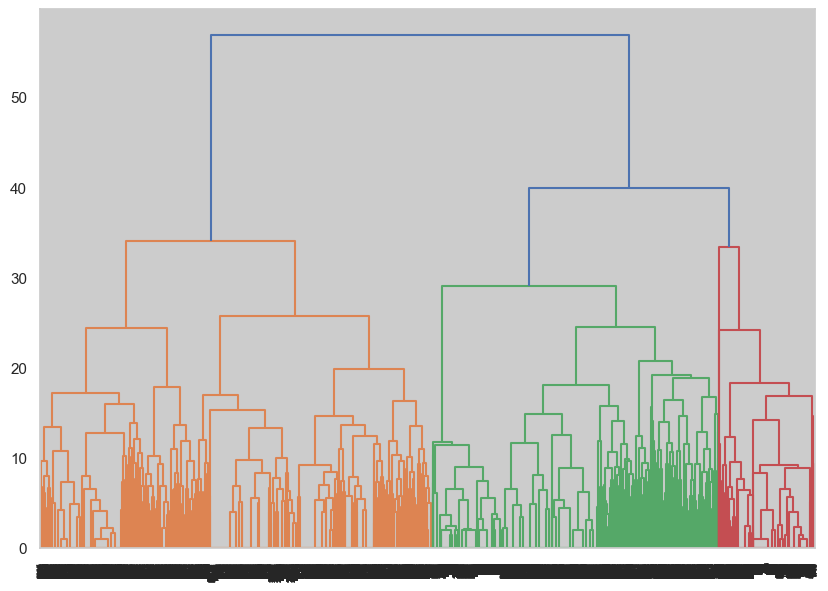

In [73]:
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as sch

distance_mat = dist.pdist(predictionsFMRI, metric='euclidean')
hierarchical = sch.linkage(distance_mat, method='average')
np.random.seed(240)
plt.figure(figsize=(10, 7))
sch.dendrogram(hierarchical)
plt.show()

This suggests that there are two main groups. Let's compare this to the the trialset we did initially.

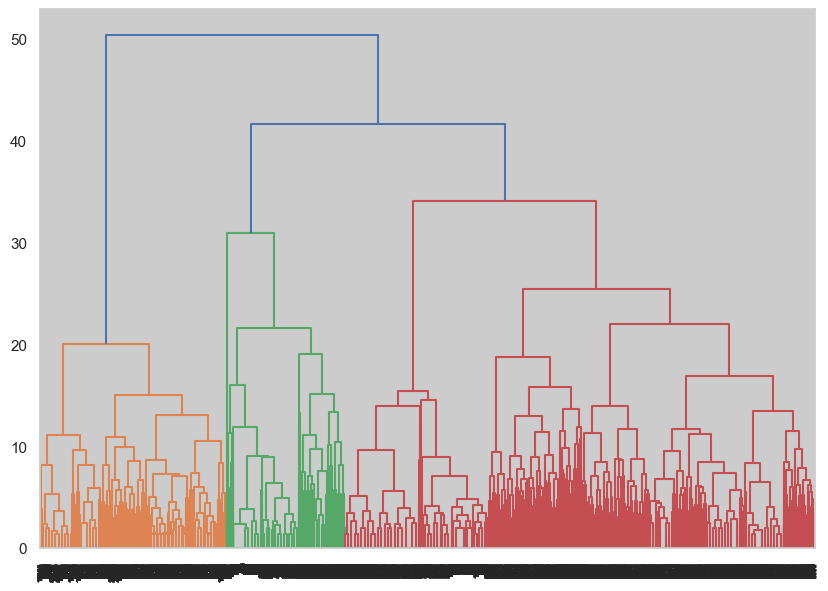

In [74]:
distance_mat = dist.pdist(predictions, metric='euclidean')
hierarchical = sch.linkage(distance_mat, method='average')
np.random.seed(240)
plt.figure(figsize=(10, 7))
sch.dendrogram(hierarchical)
plt.show()

The optimal solution is 3 clusters, though we anticipated 4. Let's take a look at the distribution through parameter space.

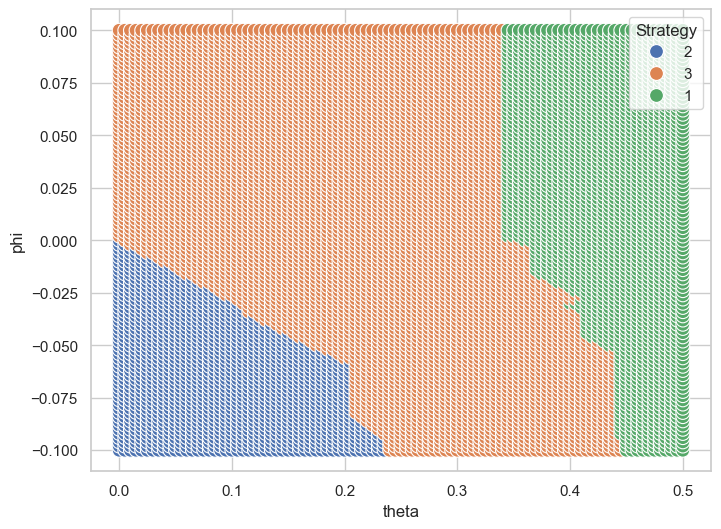

In [75]:
freeParameters['Strategy'] = sch.fcluster(hierarchical, 3, criterion='maxclust').astype(str)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=freeParameters, x='theta', y='phi', hue='Strategy', s=100)
plt.show()

Here, we see that there is only one point in the strategy = 3 group: at [0, 0]. Let's clip the whole left side (at X = 0) to see what the effect would be when self interest plays any role.

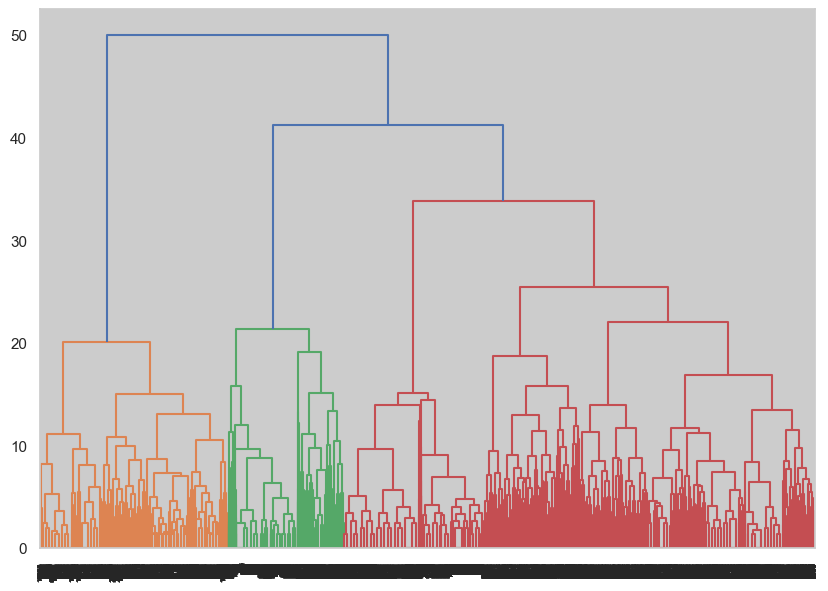

In [76]:
predictionsClipped = predictions.iloc[range(101, len(freeParameters)), :]
distance_mat = dist.pdist(predictionsClipped, metric='euclidean')
hierarchical = sch.linkage(distance_mat, method='average')
np.random.seed(240)
plt.figure(figsize=(10, 7))
sch.dendrogram(hierarchical)
plt.show()

So this seems to support our conclusion - and it makes sense given that we the point(s) where decisions are arbitrary. Let's look at the distribution here.

C:\Users\DELL\AppData\Local\Temp\ipykernel_28876\500725657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeParametersClipped['Strategy'] = sch.fcluster(hierarchical, 4, criterion='maxclust').astype(str)


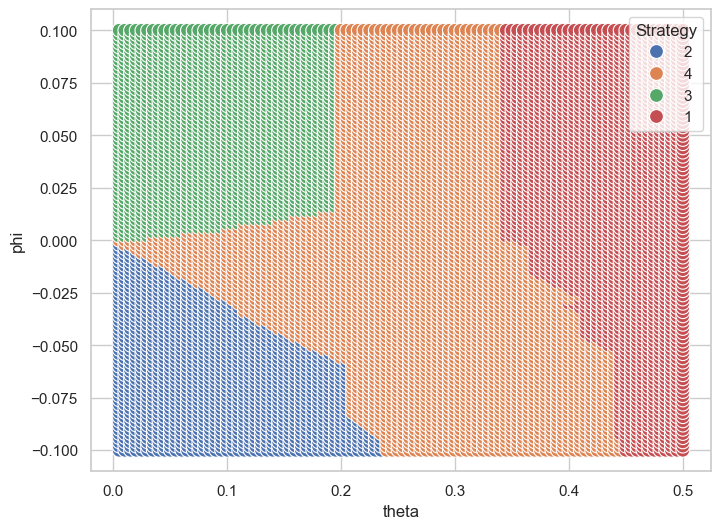

In [77]:
freeParametersClipped = freeParameters.iloc[range(101, len(freeParameters)), :]
freeParametersClipped['Strategy'] = sch.fcluster(hierarchical, 4, criterion='maxclust').astype(str)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=freeParametersClipped, x='theta', y='phi', hue='Strategy', s=100)
plt.show()

Let's keep this parameter space and adjust the parameter boundaries to enforce this distinction.

In [78]:
initial_params = [0.005, 0]
lower_bounds = [0.005, -0.1]
upper_bounds = [0.5, 0.1]

Let's rename these based on where they are: bottom left should be guilt averse, top left should be inequality averse, middle should be moral opportunism (i.e. strategy switching) and right should be greedy:

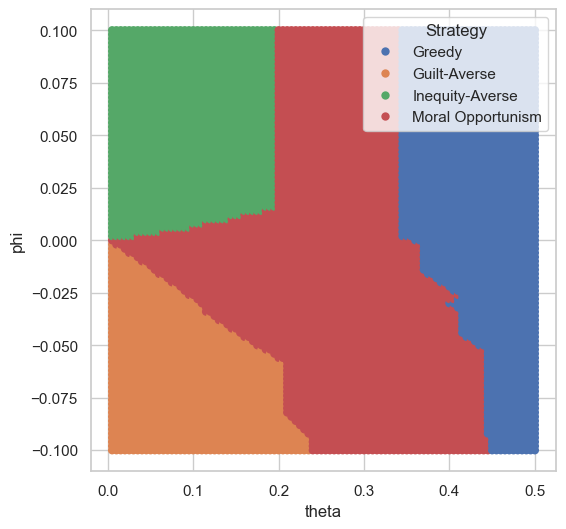

In [85]:
freeParametersClipped.loc[freeParametersClipped['Strategy'] == '1', 'Strategy'] = 'Greedy'
freeParametersClipped.loc[freeParametersClipped['Strategy'] == '2', 'Strategy'] = 'Guilt-Averse'
freeParametersClipped.loc[freeParametersClipped['Strategy'] == '3', 'Strategy'] = 'Inequity-Averse'
freeParametersClipped.loc[freeParametersClipped['Strategy'] == '4', 'Strategy'] = 'Moral Opportunism'
category_order = ['Greedy', 'Guilt-Averse', 'Inequity-Averse', 'Moral Opportunism']

freeParametersClipped['Strategy'] = pd.Categorical(freeParametersClipped['Strategy'], categories=category_order, ordered=True)

plt.figure(figsize=(6, 6))
sns.scatterplot(data=freeParametersClipped, x='theta', y='phi', hue='Strategy', alpha = 1, edgecolor = 'none')
plt.show()

Let's examine our model predictions within each cluster. Let's first compile across all predictions.

In [80]:
nrows = (len(predictionsClipped) * len(trialList))
freeParametersClipped = freeParametersClipped.reset_index(drop=True)
toPlot = pd.DataFrame(np.zeros((nrows, 6)))
toPlot.columns = ['Investment', 'Multiplier', 'Believed_Multiplier', 'Endowment', 'Return', 'Strategy']
toPlot['Strategy'] = toPlot['Strategy'].astype(str)
for i in range(len(predictionsClipped)):
    replacement = np.arange(i * 60, (i + 1) * 60)  
    trialList['Return'] = np.array(predictionsClipped.iloc[i, :])
    trialList['Strategy'] = str(freeParametersClipped['Strategy'].iloc[i])
    toPlot.iloc[replacement] = trialList.values
toPlot

,Investment,Multiplier,Believed_Multiplier,Endowment,Return,Strategy
0,1.0,2.0,4.0,10.0,2.0,Guilt-Averse
1,2.0,2.0,4.0,10.0,4.0,Guilt-Averse
2,3.0,2.0,4.0,10.0,6.0,Guilt-Averse
3,4.0,2.0,4.0,10.0,8.0,Guilt-Averse
4,5.0,2.0,4.0,10.0,10.0,Guilt-Averse
...,...,...,...,...,...,...
605995,6.0,6.0,4.0,10.0,0.0,Greedy
605996,7.0,6.0,4.0,10.0,0.0,Greedy
605997,8.0,6.0,4.0,10.0,0.0,Greedy
605998,9.0,6.0,4.0,10.0,0.0,Greedy


Let's plot reciprocation decisions by investment per strategy group on average for multiplier of 2:

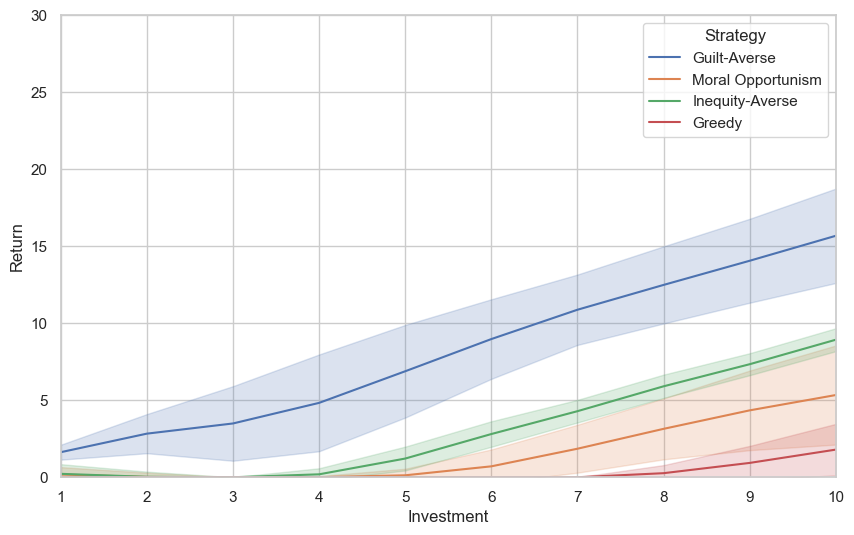

In [81]:
idx = np.where(toPlot['Multiplier'] == 2)[0]
toPlot_filtered = toPlot.iloc[idx, :]
plt.figure(figsize=(10, 6))
sns.lineplot(data=toPlot_filtered, x='Investment', y='Return', hue='Strategy', errorbar='sd') 

# Set axis limits
plt.xlim(1, 10)
plt.ylim(0, 30)
plt.show()

Now multiplier of 4:

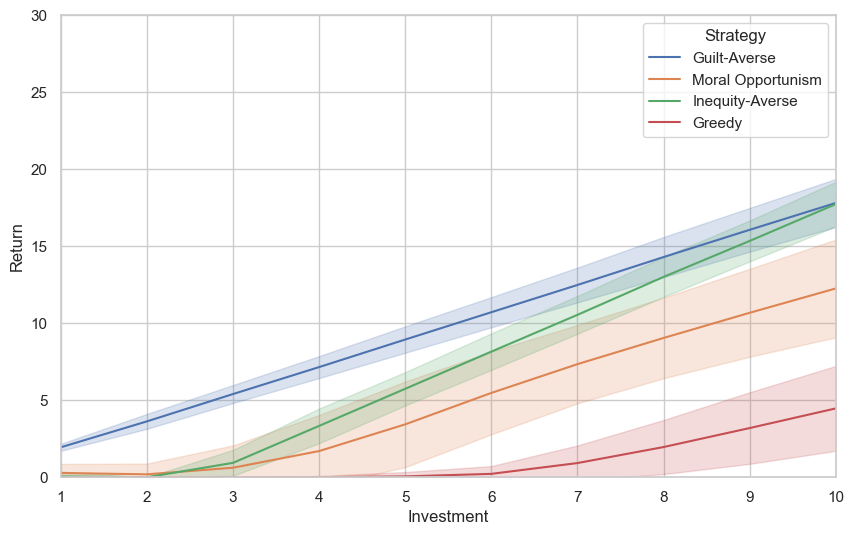

In [82]:
idx = np.where(toPlot['Multiplier'] == 4)[0]
toPlot_filtered = toPlot.iloc[idx, :]
plt.figure(figsize=(10, 6))
sns.lineplot(data=toPlot_filtered, x='Investment', y='Return', hue='Strategy', errorbar='sd') 

# Set axis limits
plt.xlim(1, 10)
plt.ylim(0, 30)
plt.show()

Now multiplier of 6:

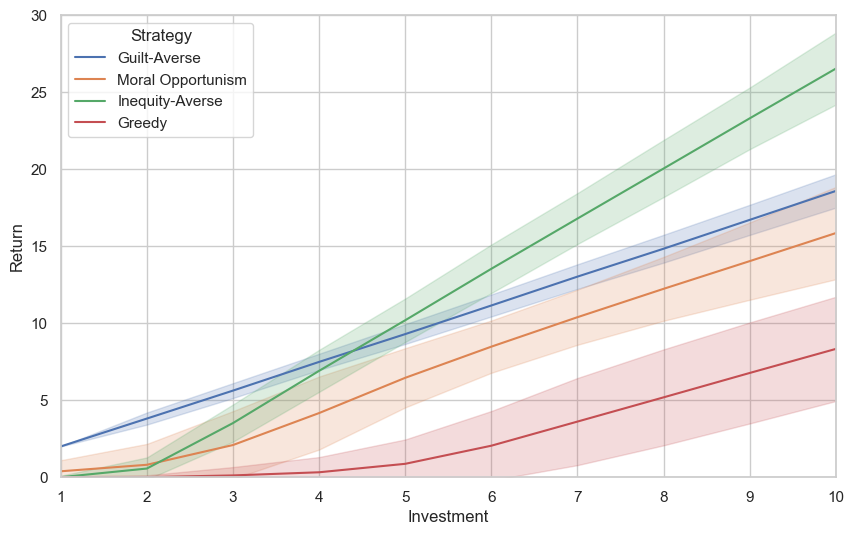

In [83]:
idx = np.where(toPlot['Multiplier'] == 6)[0]
toPlot_filtered = toPlot.iloc[idx, :]
plt.figure(figsize=(10, 6))
sns.lineplot(data=toPlot_filtered, x='Investment', y='Return', hue='Strategy', errorbar='sd') 

# Set axis limits
plt.xlim(1, 10)
plt.ylim(0, 30)
plt.show()

## 2.1 Recovering Free Parameters

First let's get the trial data from participants. We have some excluded participants so let’s read in the included subjects file to ensure that we don’t analyze excluded data.

In [86]:
batch1 = pd.read_csv('C:/Users/DELL/Downloads/tutorial1_Data/subjectsIncluded_batch1.csv', header=None)
batch2 = pd.read_csv('C:/Users/DELL/Downloads/tutorial1_Data/subjectsIncluded_batch2.csv', header=None)
included_subjects = pd.concat([batch1, batch2], axis=0).values.flatten()
included_subjects = included_subjects[~pd.isna(included_subjects)]

trialData = pd.read_csv("C:/Users/DELL/Downloads/tutorial1_Data/allDataLong.csv", sep=',')
toKeep = (trialData['Investment'] != 0) & (trialData['Returned'].isna() != True)
toKeep = trialData[toKeep].index  # Get indices of rows to keep
trialData = trialData.loc[toKeep, :]
trialData = trialData.astype(int)
trialData['Prediction'] = 0
trialData['Strategy'] = ''
trialData = trialData.reset_index(drop=True)
trialData

,Subject,Investment,Multiplier,Returned,Prediction,Strategy
0,122,3,4,2,0,
1,122,10,4,20,0,
2,122,3,4,2,0,
3,122,2,4,0,0,
4,122,6,2,4,0,
...,...,...,...,...,...,...
4629,192,4,6,8,0,
4630,192,9,6,26,0,
4631,192,5,6,10,0,
4632,192,6,4,10,0,


Now we can define some necessary variables and functions. We’re going to redefine the trial list so we have the right number of trials. We’ll create a different objective function as well so we can input the participant’s data frame instead of having to reorder their decisions to fit the old trial list.

In [88]:
subjectData = pd.DataFrame(columns=['SubjectID', 'Theta', 'Phi', 'Strategy', 'modelNLL', 'modelSS'])
def obj_function(params, df, method="OLS"):
    Theta = params[0]
    Phi = params[1]

    predicted_utility = np.zeros(len(df))
    observed_utility = np.zeros(len(df))

    for k in range(len(df)):
        I = df.iloc[k, 1]
        M = df.iloc[k, 2]
        B = 4
        E = 10
        R = int(df.iloc[k, 3])
        
        # Choices without interpolation
        if I*M > 10:
            Choices = np.arange(0, I * M + 1, round(I * M / 10))
        else:
            Choices = np.arange(0, I * M + 1, 1)

        Utility = np.zeros(len(Choices))
        for n in range(len(Choices)):
            Utility[n] = utility(Theta, Phi, guilt(I, B, Choices[n], M), inequity(I, M, Choices[n], E), payout_maximization(I, M, Choices[n]))

        predicted_utility[k] = np.max(Utility)
        Choices = Choices.tolist()
        try:
            Choice = Choices.index(R)
        except ValueError:
            closest_index = (np.abs(np.array(Choices) - R)).argmin()
            if len(closest_index) > 1:
                Choice = Choice[0]
            else:
                Choice = Choices[closest_index]
        observed_utility[k] = Utility[Choice]

    if method == "OLS":
        return np.sum((predicted_utility - observed_utility) ** 2)
    elif method == "MLE":
        sd = np.std(predicted_utility - observed_utility)  # Replace with actual standard deviation calculation if needed
        return -1 * np.sum(norm.logpdf(observed_utility, loc=predicted_utility, scale=sd))

Which allows us to Recover Free Parameters and Define Predicted Decisions

In [89]:
for i in range(0, len(included_subjects)):
    df = trialData[trialData['Subject'] == included_subjects[i]].copy()
    df = df.reset_index(drop=True)

    result = minimize(obj_function, x0=initial_params, args=(df,), bounds=list(zip(lower_bounds, upper_bounds)), tol=1e-08, method="L-BFGS-B")
    result_theta = result.x[0]
    result_phi = result.x[1]
    
    theta_rounded = round(result_theta * 2, 2) 
    phi_rounded = round(((result_phi + 0.1) *5), 2)
    
    closest_point = np.where(((freeParametersClipped.iloc[:, 0]*2).round(2) == theta_rounded) & (((freeParametersClipped.iloc[:, 1] + 0.1)*5).round(2) == phi_rounded))[0][0]
    strategy = freeParametersClipped.loc[closest_point, 'Strategy']
    df['Strategy'] = strategy
    
    for k in range(len(df)):
        I = df.iloc[k, 1]
        M = df.iloc[k, 2]
        R = df.iloc[k, 3]
        B = 4
        E = 10
        if I*M > 10:
            Choices = np.arange(0, I * M + 1, round(I * M / 10))
        else:
            Choices = np.arange(0, I * M + 1, 1)
        Utility = np.zeros(len(Choices))
        for n in range(len(Choices)):
            Utility[n] = utility(result_theta, result_phi, guilt(I, B, Choices[n], M), inequity(I, M, Choices[n], E), payout_maximization(I, M, Choices[n]))
        correct_choice = np.where(Utility == max(Utility))
        if len(correct_choice) > 1:
            correct_choice = correct_choice[0]
        df.at[k, 'Prediction'] = int(Choices[correct_choice])
    
    model_nll = -2 * np.log(np.sum(norm.pdf(df['Returned'], loc=df['Prediction'])))
    model_ss = np.sum((df['Returned'] - df['Prediction']) ** 2)
    
    subjectData.loc[i] = [included_subjects[i], result_theta, result_phi, strategy, model_nll, model_ss]
    
    theseTrials = np.where(trialData['Subject'] == included_subjects[i])[0]
    trialData.loc[theseTrials, 'Prediction'] = df['Prediction'].values.tolist()
    trialData.loc[theseTrials, 'Strategy'] = strategy

subjectData

,SubjectID,Theta,Phi,Strategy,modelNLL,modelSS
0,124.0,0.184113,0.036194,Inequity-Averse,-5.036056,740
1,126.0,0.074336,0.028350,Inequity-Averse,-5.058665,535
2,128.0,0.154895,0.037215,Inequity-Averse,-5.928455,176
3,129.0,0.193039,-0.091455,Guilt-Averse,-5.268876,253
4,130.0,0.046693,0.032533,Inequity-Averse,-5.835168,520
5,131.0,0.119736,-0.028313,Moral Opportunism,-5.996343,253
6,132.0,0.163778,0.042583,Inequity-Averse,-5.884172,107
7,133.0,0.123288,0.030427,Inequity-Averse,-5.331364,239
8,134.0,0.119155,0.030646,Inequity-Averse,-5.329026,421
9,135.0,0.019633,0.040683,Inequity-Averse,-6.639331,17


## 2.2 Compute Model Fit Index

We will calculate a variant of the AIC as the model fit index because we are not modeling the stochastic nature of choice behavior and we assume normally ditributed errors..

In [90]:
N = len(df) 
k = 2  
subjectData['modelAIC'] = N * np.log(subjectData['modelSS'] / N) + 2 * k

## 2.3 Identity the Best Model

We need to define new utility functions and objective functions as well.

In [91]:
def utility_greed(greed):
    return greed

def utility_guilt(theta, greed, guilt):
    return theta * greed - (1 - theta) * guilt

def utility_inequity(theta, greed, inequity):
    return theta * greed - (1 - theta) * inequity

def obj_function_guilt(params, df, method='OLS'):
    Theta = params[0]

    predicted_utility = np.zeros(len(df))
    observed_utility = np.zeros(len(df))

    for k in range(len(df)):
        I = df.iloc[k, 1]
        M = df.iloc[k, 2]
        B = 4
        E = 10
        R = int(df.iloc[k, 3])

        if I*M > 10:
            Choices = np.arange(0, (I * M) + 1, round((I * M) / 10))
        else:
            Choices = np.arange(0, (I * M) + 1, 1)

        Utility = np.zeros(len(Choices))

        for n in range(len(Choices)):
            Utility[n] = utility_guilt(Theta, payout_maximization(I, M, Choices[n]), guilt(I, B, Choices[n], M))

        predicted_utility[k] = np.max(Utility)
        Choices = Choices.tolist()
        try:
            Choice = Choices.index(R)
        except ValueError:
            closest_index = (np.abs(np.array(Choices) - R)).argmin()
            if len(closest_index) > 1:
                Choice = Choice[0]
            else:
                Choice = Choices[closest_index]
        observed_utility[k] = Utility[Choice]

    if method == 'OLS':
        result = np.sum((predicted_utility - observed_utility)**2)
    elif method == 'MLE':
        result = -1 * np.sum(np.log(norm.pdf(observed_utility, loc=predicted_utility, scale=sd)))

    return result


def obj_function_inequity(params, df, method='OLS'):
    Theta = params[0]

    predicted_utility = np.zeros(len(df))
    observed_utility = np.zeros(len(df))

    for k in range(len(df)):
        I = df.iloc[k, 1]
        M = df.iloc[k, 2]
        B = 4
        E = 10
        R = int(df.iloc[k, 3])

        if I*M > 10:
            Choices = np.arange(0, (I * M) + 1, round((I * M) / 10))
        else:
            Choices = np.arange(0, (I * M) + 1, 1)

        Utility = np.zeros(len(Choices))

        for n in range(len(Choices)):
            Utility[n] = utility_inequity(Theta, payout_maximization(I, M, Choices[n]), inequity(I, M, Choices[n], E))

        predicted_utility[k] = np.max(Utility)
        Choices = Choices.tolist()
        try:
            Choice = Choices.index(R)
        except ValueError:
            closest_index = (np.abs(np.array(Choices) - R)).argmin()
            if len(closest_index) > 1:
                Choice = Choice[0]
            else:
                Choice = Choices[closest_index]
        observed_utility[k] = Utility[Choice]

    if method == 'OLS':
        result = np.sum((predicted_utility - observed_utility)**2)
    elif method == 'MLE':
        result = -1 * np.sum(np.log(norm.pdf(observed_utility, loc=predicted_utility, scale=sd)))

    return result

And now we can preallocate the new data frame for the alternative models

In [93]:
altSubjectData = pd.DataFrame(columns=['SubjectID', 'guilt_theta', 'inequity_theta', 'greed_modelNLL', 'greed_modelSS', 'guilt_modelNLL', 'guilt_modelSS', 'inequity_ModelNLL', 'inequity_ModelSS'])

Now let’s Recover Free Parameters and Generate Predictions for this Model

In [94]:
for i in range(0, len(included_subjects)):
    df = trialData[trialData['Subject'] == included_subjects[i]].copy()
    df = df.reset_index(drop=True)

    result_guilt = minimize(obj_function_guilt, x0=[0.5], args=(df,), bounds=[(0, 1)], method='L-BFGS-B')
    result_inequity = minimize(obj_function_inequity, x0=[0.5], args=(df,), bounds=[(0, 1)], method='L-BFGS-B')

    df['PredictionGreed'] = np.nan
    df['PredictionGuilt'] = df['PredictionGreed'].copy()
    df['PredictionInequity'] = df['PredictionGreed'].copy()

    for k in range(len(df)):
        I = df.iloc[k, df.columns.get_loc('Investment')]
        M = df.iloc[k, df.columns.get_loc('Multiplier')]
        R = df.iloc[k, df.columns.get_loc('Returned')]
        B = 4
        E = 10
        Choices = np.arange(0, I * M + 1, round(I * M / 10)) if I*M > 10 else np.arange(0, I * M + 1)

        UtilityGreed = np.zeros(len(Choices))
        UtilityGuilt = np.zeros(len(Choices))
        UtilityInequity = np.zeros(len(Choices))

        for n in range(len(Choices)):
            UtilityGreed[n] = utility_greed(payout_maximization(I, M, Choices[n]))
            UtilityGuilt[n] = utility_guilt(result_guilt.x[0], payout_maximization(I, M, Choices[n]), guilt(I, B, Choices[n], M))
            UtilityInequity[n] = utility_inequity(result_inequity.x[0], payout_maximization(I, M, Choices[n]), inequity(I, M, Choices[n], E))
        
        correct_choice_greed = np.where(UtilityGreed == max(UtilityGreed))[0]
        if len(correct_choice_greed) > 1:
            correct_choice_greed = correct_choice_greed[0]

        correct_choice_guilt = np.where(UtilityGuilt == max(UtilityGuilt))[0]
        if len(correct_choice_guilt) > 1:
            correct_choice_guilt = correct_choice_guilt[0]

        correct_choice_inequity = np.where(UtilityInequity == max(UtilityInequity))[0]
        if len(correct_choice_inequity) > 1:
            correct_choice_inequity = correct_choice_inequity[0]

        df.at[k, 'PredictionGreed'] = Choices[correct_choice_greed]
        df.at[k, 'PredictionGuilt'] = Choices[correct_choice_guilt]
        df.at[k, 'PredictionInequity'] = Choices[correct_choice_inequity]

    model_NLL_Greed = -2 * np.log(np.sum(norm.pdf(df['Returned'], loc=df['PredictionGreed'])))
    model_SS_Greed = np.sum((df['Returned'] - df['PredictionGreed']) ** 2)
    model_NLL_Guilt = -2 * np.log(np.sum(norm.pdf(df['Returned'], loc=df['PredictionGuilt'])))
    model_SS_Guilt = np.sum((df['Returned'] - df['PredictionGuilt']) ** 2)
    model_NLL_Inequity = -2 * np.log(np.sum(norm.pdf(df['Returned'], loc=df['PredictionInequity'])))
    model_SS_Inequity = np.sum((df['Returned'] - df['PredictionInequity']) ** 2)

    altSubjectData.loc[i] = [included_subjects[i], result_guilt.x[0], result_inequity.x[0], model_NLL_Greed, model_SS_Greed, model_NLL_Guilt, model_SS_Guilt, model_NLL_Inequity, model_SS_Inequity]

altSubjectData

,SubjectID,guilt_theta,inequity_theta,greed_modelNLL,greed_modelSS,guilt_modelNLL,guilt_modelSS,inequity_ModelNLL,inequity_ModelSS
0,124.0,0.309786,0.184094,-3.976671,7087.0,-5.656425,1508.0,-5.036056,740.0
1,126.0,0.298779,0.074336,-3.291832,7270.0,-4.741600,1056.0,-5.058665,535.0
2,128.0,0.365706,0.154913,-4.491331,5193.0,-4.118121,982.0,-5.928455,176.0
3,129.0,0.193026,0.000000,-0.671654,8217.0,-5.268876,253.0,-4.781607,672.0
4,130.0,0.293458,0.046693,-3.008339,7225.0,-5.204630,878.0,-5.835168,520.0
5,131.0,0.255814,0.000000,-2.410593,6979.0,-4.510863,373.0,-4.867618,764.0
6,132.0,0.346960,0.163796,-3.957945,5746.0,-4.597649,1108.0,-5.884172,107.0
7,133.0,0.303100,0.123288,-4.555276,9163.0,-4.291802,1770.0,-5.310575,254.0
8,134.0,0.321697,0.119173,-3.986492,6667.0,-4.722608,1322.0,-5.329026,421.0
9,135.0,0.275837,0.019677,-3.435688,10340.0,-4.603511,1891.0,-6.639331,17.0


Now we can compute AIC for these models

In [95]:
N = len(altSubjectData)

altSubjectData['modelAICGreed'] = N * np.log(altSubjectData['greed_modelSS'] / N) + 2 * 0
altSubjectData['modelAICGuilt'] = N * np.log(altSubjectData['guilt_modelSS'] / N) + 2 * 1
altSubjectData['modelAICInequity'] = N * np.log(altSubjectData['inequity_ModelSS'] / N) + 2 * 1

And now we can compare the AIC of all models

In [96]:
averageAIC = [np.mean(subjectData['modelAIC']), np.mean(altSubjectData['modelAICGreed']), np.mean(altSubjectData['modelAICGuilt']), np.mean(altSubjectData['modelAICInequity'])]
fullAIC = [np.sum(subjectData['modelAIC']), np.sum(altSubjectData['modelAICGreed']), np.sum(altSubjectData['modelAICGuilt']), np.sum(altSubjectData['modelAICInequity'])]

bestModelIndex = np.argmin(averageAIC)
bestModel = ['Moral Strategies Model', 'Greed Model', 'Guilt Model', 'Inequity Model'][bestModelIndex]  

bestModelFullDatasetIndex = np.argmin(fullAIC)
bestModelFullDataset = ['Moral Strategies Model', 'Greed Model', 'Guilt Model', 'Inequity Model'][bestModelFullDatasetIndex] 
print(bestModel, bestModelFullDataset)

Moral Strategies Model Moral Strategies Model


Obviously, using the average and the sum will always produce the same answer in this situation. The best model is the two norm model so let’s go and validate it!

## 2.4 Validate the Best Model

First, let’s assess model performance at a basic level: the best measure of this is explained variance (i.e. R-squared). To do this, we'll need to prune away the missing values.

In [97]:
toKeep = (trialData['Strategy'] != '')
toKeep = trialData[toKeep].index  # Get indices of rows to keep
trialData = trialData.loc[toKeep, :]
trialData = trialData.reset_index(drop=True)
trialData

,Subject,Investment,Multiplier,Returned,Prediction,Strategy
0,124,10,2,3,8,Inequity-Averse
1,124,7,4,7,9,Inequity-Averse
2,124,10,4,10,15,Inequity-Averse
3,124,3,6,4,2,Inequity-Averse
4,124,10,2,3,8,Inequity-Averse
...,...,...,...,...,...,...
4325,192,4,6,8,8,Inequity-Averse
4326,192,9,6,26,25,Inequity-Averse
4327,192,5,6,10,11,Inequity-Averse
4328,192,6,4,10,9,Inequity-Averse


Now getting the R-squared from a single regression:

In [98]:
import statsmodels.api as sm

model = sm.OLS(trialData['Returned'], sm.add_constant(trialData['Prediction'])).fit()

print(model.rsquared)

0.8801374609356896


88% variance explained - nice! This means that the model is really good at predicting the decisions people make. Next, we check assumptions - first linearity:

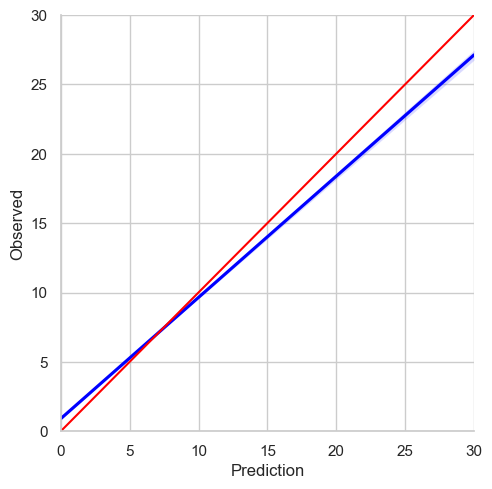

In [99]:
sns.lmplot(x='Prediction', y='Returned', data=trialData, scatter=False, line_kws={'color': 'blue'}, ci=95)
plt.plot([0, 30], [0, 30], color='red')  # geom_abline equivalent
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('Prediction')
plt.ylabel('Observed')
plt.show()

Looks okay, not exactly perfect but still decent. Second, normality of error:

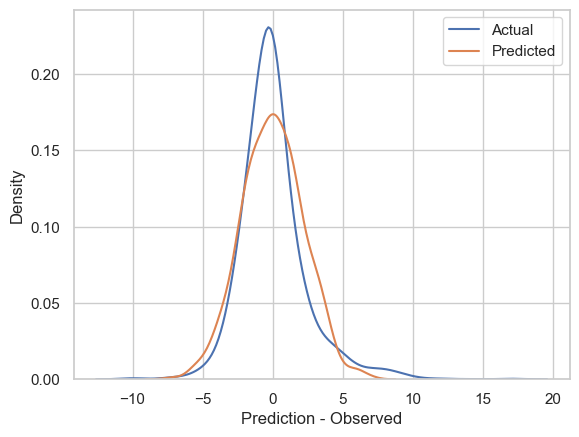

In [100]:
std_dev = np.std(trialData['Prediction'] - trialData['Returned'])
normvals = norm.rvs(loc=0, scale=std_dev, size=1000)

sns.kdeplot(trialData['Prediction'] - trialData['Returned'], bw_adjust=2, label='Actual', fill=False)
sns.kdeplot(normvals, bw_adjust=1, label='Predicted', fill=False)
plt.xlabel('Prediction - Observed')
plt.ylabel('Density')
plt.legend()
plt.show()

Looks very good - not skewed and leptokurtic, though this isn’t the end of the world. Third we can examine independence of error:

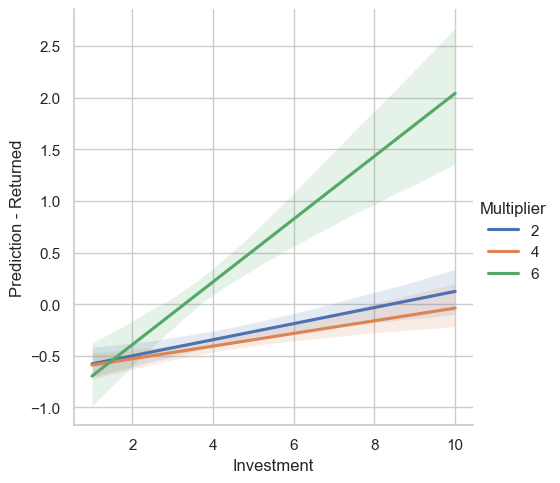

In [101]:
trialData['Prediction - Returned'] = trialData['Prediction'] - trialData['Returned']

sns.lmplot(x='Investment', y='Prediction - Returned', hue='Multiplier', scatter= False, data=trialData, robust=True)  
plt.show()

It seems that the model slightly underpredicts reciprocity at middling investment values for multiplier of 2 and 4 and really overpredicts at high investment values for the 6 multiplier (3.5 tokens on average). This is likely an artifact of individual variance in reciprocation behavior: some people may have a ceiling on how much they are willing to return so it doesn’t necessarily invalidate the model: it simply represents a limitation in the extent to which the model captures idiosyncrisies. So we can proceed, but with caution. And finally homoscedasticity:

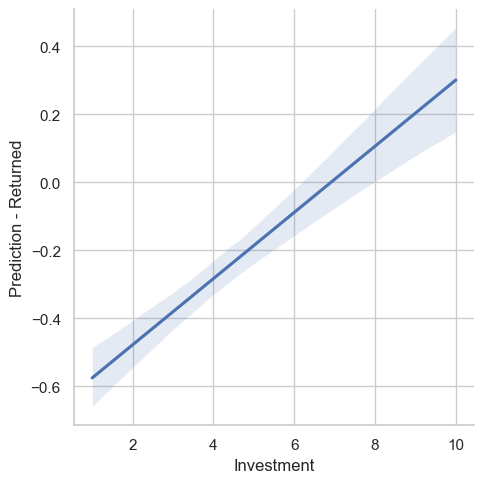

In [102]:
sns.lmplot(x='Investment', y='Prediction - Returned', data=trialData, robust=True, scatter=False)  
plt.show()

This is a nice, even variance cloud. We see the effects from the above plot averaged across levels of the multiplier so, given that we’ve discussed the moderate violation of independence error, we can proceed. 

To assess independence, you can follow the R or MatLab tutorial - it is not strictly necessary.

Let's jump to fivefold validation

In [154]:
from sklearn.model_selection import KFold

fivefold = pd.DataFrame(columns=['SS'] + [f'Par1_fold{i}' for i in range(1, 6)] + [f'Par2_fold{i}' for i in range(1, 6)] + ['SubjectID'])
trialData['Prediction_ff'] = 0.0

for i in range(len(included_subjects)):
    df = trialData[trialData['Subject'] == included_subjects[i]].copy()
    df = df.reset_index(drop=True)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    Theta_ff = np.zeros(5)
    Phi_ff = np.zeros(5)
    SS_ff = 0
    Prediction_ff = np.zeros(len(df))

    for z, (train_index, test_index) in enumerate(kf.split(df)):
        train_data = df.iloc[train_index].reset_index(drop=True)
        test_data = df.iloc[test_index].reset_index(drop=True)

        result_ff = minimize(obj_function, x0=initial_params, args=(train_data,), bounds=list(zip(lower_bounds, upper_bounds)), tol=1e-08, method="L-BFGS-B")

        Theta_ff[z] = result_ff.x[0]
        Phi_ff[z] = result_ff.x[1]

        for k in range(len(test_data)):
            I = test_data.iloc[k, 1]
            M = test_data.iloc[k, 2]
            B = 4
            E = 10
            R = int(test_data.iloc[k, 3])

            if I*M > 10:
                Choices = np.arange(0, I * M + 1, round(I * M / 10))
            else:
                Choices = np.arange(0, I * M + 1, 1)

            Utility = np.zeros(len(Choices))
            for q in range(len(Choices)):
                Utility[q] = utility(result_ff.x[0], result_ff.x[1], guilt(I, B, Choices[q], M), inequity(I, M, Choices[q], E), payout_maximization(I, M, Choices[q]))
            
            correct_choice = np.where(Utility == max(Utility))[0]
            if len(correct_choice) > 1:
                correct_choice = correct_choice[0] 
            Prediction_ff[test_index[k]] = int(Choices[correct_choice])

    SS_ff = np.sum((df['Returned'].astype(float) - Prediction_ff) ** 2)
    fivefold.loc[i] = [SS_ff] + Theta_ff.tolist() + Phi_ff.tolist() + [included_subjects[i]]
    
    theseTrials = np.where(trialData['Subject'] == included_subjects[i])[0]
    trialData.loc[theseTrials, 'Prediction_ff'] = Prediction_ff.tolist()

Now we can check the model accuracy:

In [155]:
(np.mean(fivefold['SS'])/len(df))**0.5 - (np.mean(subjectData['modelSS'])/len(df))**0.5

0.06262322770936857

Not such a big loss in accuracy. And let's test against the normal model

In [166]:
from scipy.stats import ttest_rel
fivefold['AIC'] = len(df) * np.log(fivefold['SS']/len(df)) + 2 * 2
print(ttest_rel(fivefold['AIC'], subjectData['modelAIC']))

TtestResult(statistic=2.3414360746424565, pvalue=0.022793645723703, df=56)


So it's significantly higher, but considering that we haven't lost so much in accuracy it should be fine. And to assess the reliability, we can compute cosine similiarity:

In [163]:
from sklearn.metrics.pairwise import cosine_similarity

cosines = []
for i in range(5):
    cosines.append(cosine_similarity([subjectData['Theta'].values], [fivefold.iloc[:, i + 1].values])[0][0])
    cosines.append(cosine_similarity([subjectData['Phi'].values], [fivefold.iloc[:, i + 6].values])[0][0])

cosines = np.array(cosines)

First, we can look at theta:

In [164]:
print(np.mean(cosines[:5]))

0.9475081683402268


Pretty good. Now we can look at phi:

In [165]:
print(np.mean(cosines[5:10]))

0.9124517223490095


Also pretty reasonable. If we had poor similarity, we could adjust the parameters like we did in section 1.6 to adjust distance computation.

## 3.1 Compare Models

Let's first see if the best model (having all three norms of greed, inequality-aversion, and guilt-aversion) beats a model with only greed.

In [169]:
print(ttest_rel(altSubjectData['modelAICGreed'], subjectData['modelAIC']))

TtestResult(statistic=14.219999935096064, pvalue=3.0976836668432194e-20, df=56)


Much better. How about Greed and Guilt-Aversion?

In [171]:
print(ttest_rel(altSubjectData['modelAICGuilt'], subjectData['modelAIC']))

TtestResult(statistic=3.670009051565754, pvalue=0.0005423110306609644, df=56)


Better again. How about Greed and Inequity-Aversion

In [172]:
print(ttest_rel(altSubjectData['modelAICInequity'], subjectData['modelAIC']))

TtestResult(statistic=0.9148909274044463, pvalue=0.3641716374372621, df=56)


Not significant. Interesting that we don't replicate the finding from the R tutorial or the paper. Okay all done here.

## 3.3 Test for Individual Differences

Let's first recover parameters over the whole dataset and we can assess how accurate it is

In [188]:
result = minimize(obj_function, x0=initial_params, bounds=list(zip(lower_bounds, upper_bounds)), args=(trialData,), method='L-BFGS-B')

trialData['PredictedNID'] = np.nan
for i in range(len(trialData)):
    I = trialData.iloc[i]['Investment']
    M = trialData.iloc[i]['Multiplier']
    
    if I*M > 10:
        Choices = np.arange(0, I * M + 1, round(I * M / 10))
    else:
        Choices = np.arange(0, I * M + 1, 1)
    
    Utility = np.zeros(len(Choices))
    for n in range(len(Choices)):
        Utility[n] = utility(result.x[0], result.x[1], guilt(I, 4, Choices[n], M), inequity(I, M, Choices[n], 10), payout_maximization(I, M, Choices[n]))
    
    trialData.loc[i, 'PredictedNID'] = Choices[np.argmax(Utility)]

model = sm.OLS(trialData['Returned'], sm.add_constant(trialData['PredictedNID'])).fit()

print(model.rsquared)


0.790481467390051


Surprisingly good 79% explained variance against 88%. Let’s test for individual differences.

In [189]:
subjectData['SS_NID'] = 0.0
for i in range(len(subjectData)):
    trials = np.where(subjectData.loc[i, 'SubjectID'] == trialData['Subject'])
    subjectData.loc[i, 'SS_NID'] = np.sum(trialData.loc[trials, 'Returned'] - trialData.loc[trials, 'PredictedNID'])**2

subjectData['AIC_NID'] = len(df) * np.log(subjectData['SS_NID']/len(df)) + 2 * (2/len(subjectData))
print(ttest_rel(subjectData['AIC_NID'], subjectData['modelAIC']))

TtestResult(statistic=8.34218283293314, pvalue=2.1212906670494824e-11, df=56)


Significant individual differences. Let's see which models are worse than this.

In [192]:
np.where(fullAIC > np.sum(subjectData['AIC_NID']))

(array([], dtype=int64),)

So this is the worst model in the set.